In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [1]:
import sys

sys.path.insert(0, "../")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import config
from audio import audio_to_melspectrogram, show_melspectrogram
from utils import load_labels, show_spectrograms

# Data and Visualization

In [2]:
# read data
X_train = np.load("../data/DOCC10_train/DOCC10_Xtrain.npy")
X_test = np.load("../data/DOCC10_test/DOCC10_Xtest.npy")
Y_train_df = pd.read_csv("../data/DOCC10_train/DOCC10_Ytrain.csv", index_col=0)

print("X train", X_train.shape, "Y_train", Y_train_df.shape, "X_test", X_test.shape)

X train (113120, 8192) Y_train (113120, 1) X_test (20960, 8192)


In [268]:
all_classes = list(set(Y_train_df.TARGET.values))
all_classes

['ZC', 'ME', 'SSP', 'GG', 'UDB', 'GMA', 'UDA', 'LA', 'PM', 'MB']

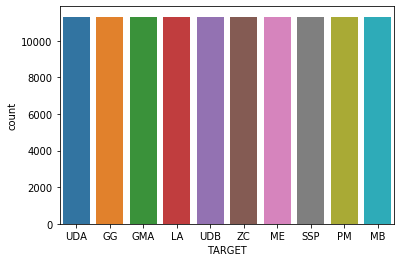

In [4]:
# Perfectly balanced, as all things should be
sns.countplot(x="TARGET", data=Y_train_df)
plt.show()

In [256]:
def show_clicks(n_plots, classes):
    fig, axes = plt.subplots(n_plots, len(classes), figsize=(2 * len(classes), 2 * n_plots))
    for j in range(len(classes)):
        X_sub = X_train[(Y_train_df == classes[j]).values.flatten()]
        axes[0, j].set_title(classes[j])
        for i in range(n_plots):
            idx = np.random.randint(len(X_sub))
            axes[i, j].plot(X_sub[idx])
            axes[i, j].get_xaxis().set_visible(False)
            axes[i, j].get_yaxis().set_visible(False)
    plt.show()

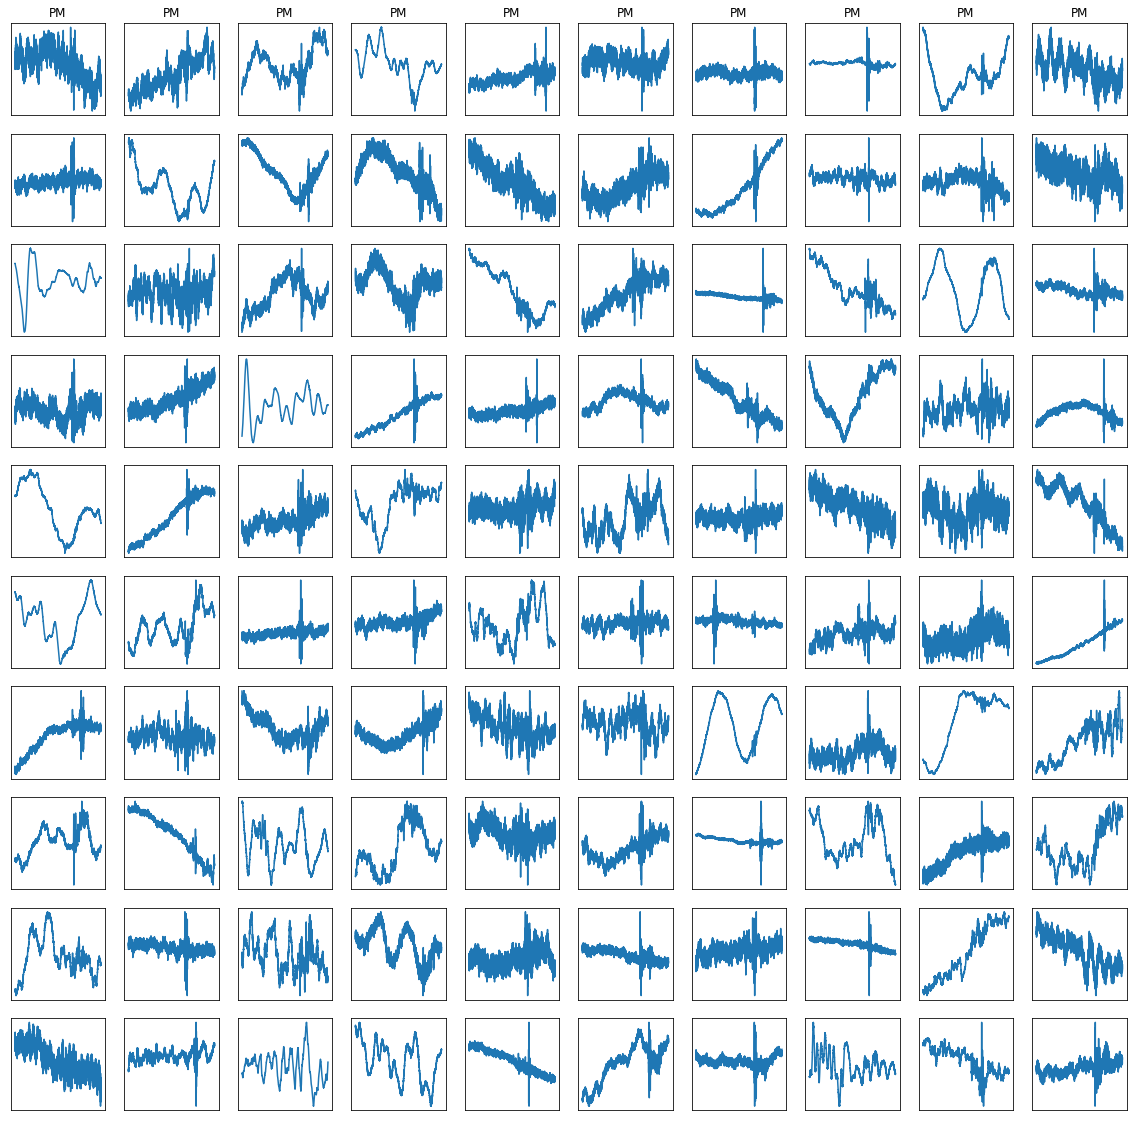

In [261]:
classes = ['PM'] * 10
show_clicks(10, classes)

## Test signals

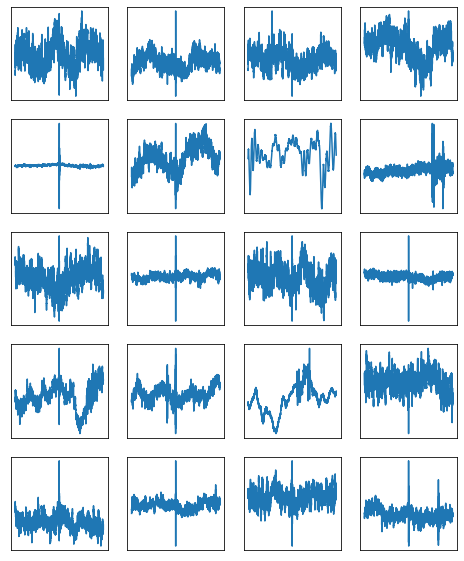

In [267]:
n, m = 4, 5
fig, axes = plt.subplots(m, n, figsize=(2 * n, 2 * m))
for i in range(m):
    for j in range(n):
        idx = np.random.randint(len(X_test))
        axes[i, j].plot(X_test[idx])
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
plt.show()

## Zoom on the click

In [248]:
def zoom_on_click(signal, window):
    click_center = 2 ** 12
    zoom = signal[click_center - window // 2 : click_center + window // 2]
    return zoom


def show_zoom_clicks(n_plots, classes, window):
    fig, axes = plt.subplots(n_plots, len(classes), figsize=(10, 2 * n_plots))
    for j in range(len(classes)):
        X_sub = X_train[(Y_train_df == classes[j]).values.flatten()]
        axes[0, j].set_title(classes[j])
        for i in range(n_plots):
            idx = np.random.randint(len(X_sub))
            signal = zoom_on_click(X_sub[idx], window)
            axes[i, j].plot(signal)
            axes[i, j].get_xaxis().set_visible(False)
            axes[i, j].get_yaxis().set_visible(False)
    plt.show()

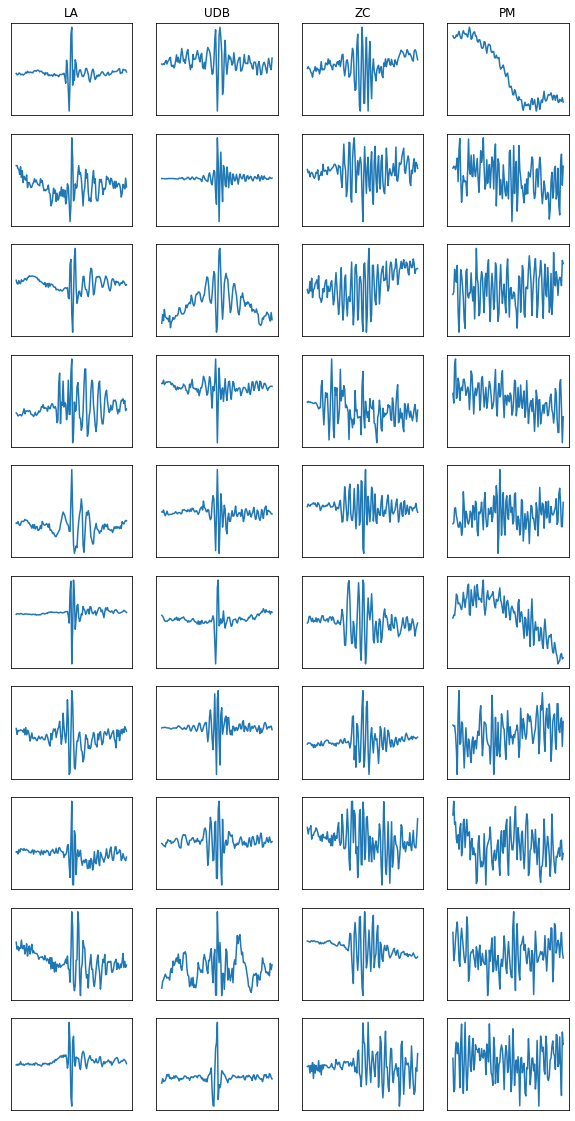

In [249]:
show_zoom_clicks(10, classes, 128)

## Spectrograms

In [10]:
def show_spectrograms(n_plots, classes, zoom=0, **spec_params):
    fig, axes = plt.subplots(n_plots, len(classes), figsize=(10, 2 * n_plots))
    for j in range(len(classes)):
        X_sub = X_train[(Y_train_df == classes[j]).values.flatten()]
        axes[0, j].set_title(classes[j])
        for i in range(n_plots):
            idx = np.random.randint(len(X_sub))
            if zoom:
                signal = zoom_on_click(X_sub[idx], zoom)
            else:
                signal = X_sub[idx]
            axes[i, j].specgram(signal, **spec_params)
            axes[i, j].get_xaxis().set_visible(False)
            if j:
                axes[i, j].get_yaxis().set_visible(False)
    plt.show()

<IPython.core.display.Javascript object>

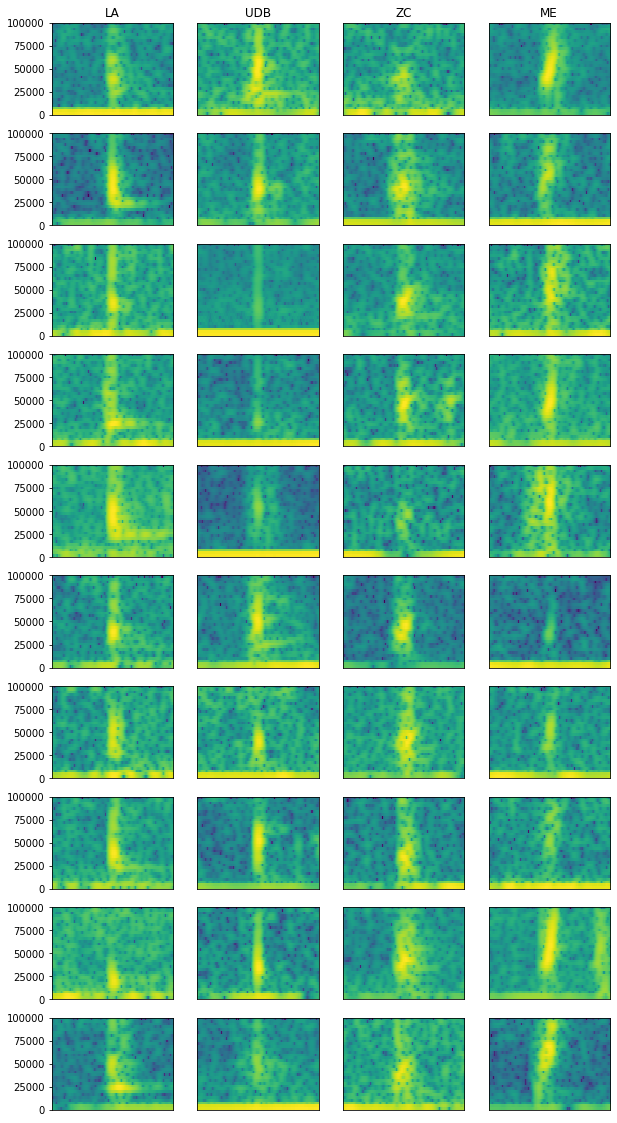

<IPython.core.display.Javascript object>

In [14]:
show_spectrograms(
    10, classes, zoom=512, Fs=200000, NFFT=64, noverlap=60, window=np.blackman(M=64)
)

## Mel Spectrograms

['LA']


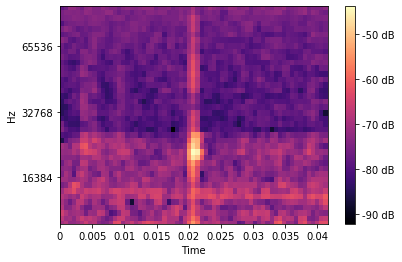

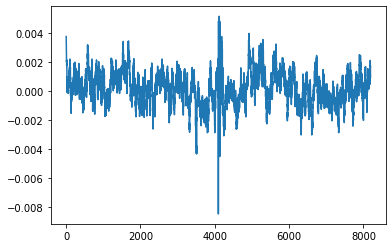

In [245]:
idx = np.random.randint(len(X_train))
print(Y_train_df.values[idx])
show_melspectrogram(audio_to_melspectrogram(X_train[idx]))
plt.plot(X_train[idx])